# –í—ã—è–≤–ª–µ–Ω–∏–µ –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–µ–≤ —Å BERT

## –û–ø–∏—Å–∞–Ω–∏–µ –ø—Ä–æ–µ–∫—Ç–∞

–ò–Ω—Ç–µ—Ä–Ω–µ—Ç-–º–∞–≥–∞–∑–∏–Ω –∑–∞–ø—É—Å–∫–∞–µ—Ç –Ω–æ–≤—ã–π —Å–µ—Ä–≤–∏—Å ‚Äî –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ —Å–∞–º–∏ –º–æ–≥—É—Ç —Ä–µ–¥–∞–∫—Ç–∏—Ä–æ–≤–∞—Ç—å –∏ –¥–æ–ø–æ–ª–Ω—è—Ç—å –æ–ø–∏—Å–∞–Ω–∏—è —Ç–æ–≤–∞—Ä–æ–≤, –∫–∞–∫ –≤ –≤–∏–∫–∏-—Å–æ–æ–±—â–µ—Å—Ç–≤–∞—Ö.  –ü–æ—ç—Ç–æ–º—É –º–∞–≥–∞–∑–∏–Ω—É –Ω—É–∂–µ–Ω –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç, –∫–æ—Ç–æ—Ä—ã–π –±—É–¥–µ—Ç –∏—Å–∫–∞—Ç—å —Ç–æ–∫—Å–∏—á–Ω—ã–µ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–∏ –∏ –æ—Ç–ø—Ä–∞–≤–ª—è—Ç—å –∏—Ö –Ω–∞ –º–æ–¥–µ—Ä–∞—Ü–∏—é. 

–ó–∞–¥–∞—á–∞ ‚Äî –Ω–∞ –æ—Å–Ω–æ–≤–µ –Ω–∞–±–æ—Ä–∞  –¥–∞–Ω–Ω—ã—Ö —Å —Ä–∞–∑–º–µ—Ç–∫–æ–π –æ —Ç–æ–∫—Å–∏—á–Ω–æ—Å—Ç–∏ –ø—Ä–∞–≤–æ–∫ –æ–±—É—á–∏—Ç—å –º–æ–¥–µ–ª—å –∫–ª–∞—Å—Å–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞—Ç—å –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–∏ –Ω–∞ –ø–æ–∑–∏—Ç–∏–≤–Ω—ã–µ –∏ –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã–µ. –ü–æ —É—Å–ª–æ–≤–∏—é –∑–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏ –∫–∞—á–µ—Å—Ç–≤–∞ *F1* –¥–æ–ª–∂–Ω–æ –±—ã—Ç—å –Ω–µ –º–µ–Ω—å—à–µ 0.75. 

## –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [1]:
import pandas as pd
import numpy as np
import os
import torch
import transformers 
import time
import matplotlib.pyplot as plt
from wordcloud import WordCloud
##%matplotlib inline

from tqdm import notebook
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score


from pymystem3 import Mystem
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.probability import FreqDist
from nltk import word_tokenize
from PIL import Image
import nltk

In [2]:
pth1 = 'C:/Users/Jepka/Documents/projects/yandex-practicum-DS-plus/16_toxic_comments/toxic_comments.csv'
pth2 = '/datasets/toxic_comments.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1, index_col=0)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2, index_col=0)
else:
    print('Oops!')

In [3]:
display(df.sample(5))
df.info()

text  toxic
19178   "\nI'm currently converting the article into a...      0
94288   I don‚Äôt believe I have met you before? Can you...      0
60367   Cambridge geonotices \n\nThanks for putting th...      0
139301  "\n\nMediation\nYou may interested in this med...      0
117718  "\n\nIn the mean time, I guess I've a got a so...      1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159292 entries, 0 to 159450
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


–°–æ–≥–ª–∞—Å–Ω–æ –¥–æ–∫—É–º–µ–Ω—Ç–∞—Ü–∏–∏ –∫ –¥–∞–Ω–Ω—ã–º, c—Ç–æ–ª–±–µ—Ü `text` —Å–æ–¥–µ—Ä–∂–∏—Ç —Ç–µ–∫—Å—Ç –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏—è, –∞ `toxic` ‚Äî —Ü–µ–ª–µ–≤–æ–π –ø—Ä–∏–∑–Ω–∞–∫.

–ü–æ—Å–º–æ—Ç—Ä–∏–º, –∫–∞–∫–∏–µ —Å–ª–æ–≤–∞ —á–∞—â–µ –≤—Å–µ–≥–æ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –≤ —Ç–æ–∫—Å–∏—á–Ω—ã—Ö –∏ –Ω–µ—Ç–æ–∫—Å–∏—á–Ω—ã—Ö —Ç–≤–∏—Ç–∞—Ö. –î–ª—è —ç—Ç–æ–≥–æ –æ–ø—Ä–µ–¥–µ–ª–∏–º –Ω–µ—Å–∫–æ–ª—å–∫–æ —Ñ—É–Ω–∫—Ü–∏–π:

In [5]:
def remove_chars_from_text(text, chars):  # —É–±–∏—Ä–∞–µ–º –∏–∑ —Ç–µ–∫—Å—Ç–∞ –ø—É–Ω–∫—Ç—É–∞—Ü–∏—é
    return "".join([ch for ch in text if ch not in chars])

In [6]:
def text_cleanup(text):     # —É–±–∏—Ä–∞–µ–º —Å—Ç–æ–ø-—Å–ª–æ–≤–∞ –∏–∑ —Ç–µ–∫—Å—Ç–∞    
    stopset = set(stop_words)
    cleanup = " ".join(filter(lambda word: word not in stopset, text.split()))
    return cleanup

In [7]:
def make_fdist(n):
    if (n == 1) or (n == 0):
        corpus = df.loc[df['toxic'] == n, 'text'].values.astype('U')  
        text = ' '.join(corpus)
        text = text.lower()
        text = remove_chars_from_text(text, spec_chars)
        text = remove_chars_from_text(text, string.digits)
        text_cleaned = text_cleanup(text)
        tokens = word_tokenize(text_cleaned)
        text_cleaned = nltk.Text(tokens)    
        if n == 0:
            colormap='summer'
            color='darkgreen'
            title='–°–∞–º—ã–µ —á–∞—Å—Ç—ã–µ —Å–ª–æ–≤–∞ –≤ –Ω–µ—Ç–æ–∫—Å–∏—á–Ω—ã—Ö —Ç–≤–∏—Ç–∞—Ö'
            
        else: 
            colormap = 'autumn'
            color='crimson'
            title='–°–∞–º—ã–µ —á–∞—Å—Ç—ã–µ —Å–ª–æ–≤–∞ –≤ —Ç–æ–∫—Å–∏—á–Ω—ã—Ö —Ç–≤–∏—Ç–∞—Ö'
        fdist = FreqDist(text_cleaned) 
        fdist.plot(15, cumulative=False, color=color)
        text_raw = " ".join(text_cleaned)    
        wordcloud = WordCloud(width=1400, 
                      height=1000, 
                      max_words=150, 
                      colormap=colormap, 
                      background_color ='white', 
                      collocations=False).generate(text_raw)
        plt.figure(figsize=(8,6))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.title(title);
    else: print('put 1 or 0')    

–û–ø—Ä–µ–¥–µ–ª–∏–º –Ω–∞–±–æ—Ä—ã —Å–ø–µ—Ü—Å–∏–º–≤–æ–ª–æ–≤ –∏ —Å—Ç–æ–ø-—Å–ª–æ–≤ –¥–ª—è —É–¥–∞–ª–µ–Ω–∏—è:

In [8]:
spec_chars = string.punctuation + '\n\xa0' 
stop_words = stopwords.words('english')
stop_words.extend(['u', 'im', 'dont' ])

–í—ã–≤–µ–¥–µ–º –≥—Ä–∞—Ñ–∏–∫ —á–∞—Å—Ç–æ –≤—Å—Ç—Ä–µ—á–∞—é—â–∏—Ö—Å—è —Å–ª–æ–≤ –¥–ª—è –Ω–µ—Ç–æ–∫—Å–∏—á–Ω—ã—Ö —Ç–≤–∏—Ç–æ–≤:

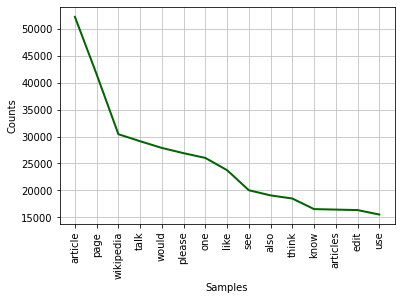

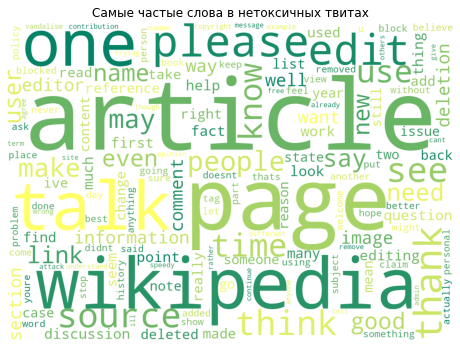

In [9]:
make_fdist(0)

–ê —Ç–µ–ø–µ—Ä—å –¥–ª—è —Ç–æ–∫—Å–∏—á–Ω—ã—Ö:

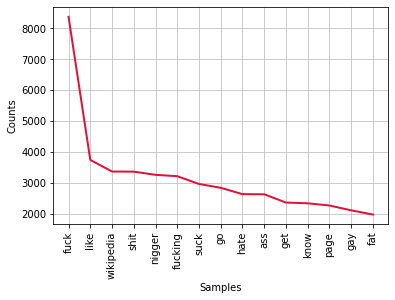

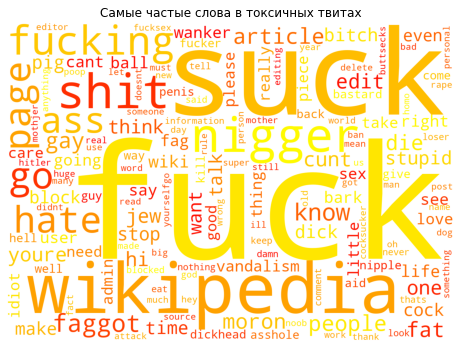

In [10]:
make_fdist(1)

–û–±—â–µ–≥–æ —É —ç—Ç–∏—Ö –Ω–∞–±–æ—Ä–æ–≤ —Å–ª–æ–≤ –Ω–µ–º–Ω–æ–≥–æ, –Ω–æ –∫–æ–µ —á—Ç–æ –µ—Å—Ç—å -  –∏ —ç—Ç–æ —Å–ª–æ–≤–æ "–≤–∏–∫–∏–ø–µ–¥–∏—è".

<div class="alert alert-info">
<font size="5"><b>–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Å—Ç—É–¥–µ–Ω—Ç–∞ üê£ </b></font> 
    
–ü–æ–ª—É—á–∏–ª—Å—è –¥–æ–≤–æ–ª—å–Ω–æ –º–∏–ª—ã–π –ø—Ä–∏–Ω—Ç –Ω–∞ —Ñ—É—Ç–±–æ–ª–∫—É üëÄ

<div class="alert alert-success">
<font size="5"><b>–ö–æ–º–º–µ–Ω—Ç–∞—Ä–∏–π —Ä–µ–≤—å—é–µ—Ä–∞V2</b></font>



–£—Å–ø–µ—Ö üëç:



–û—Ü–µ–Ω–∏–ª —Ç–≤–æ–π —é–º–æ—Ä ) –ö—Å—Ç–∞—Ç–∏ –º–æ–∂–Ω–æ –Ω–∞ –ø–µ—Ä–µ–¥–Ω–µ–π —á–∞—Å—Ç–∏ —Ñ—É—Ç–±–æ–ª–∫–∏ –≤—ã–ª–æ–∂–∏—Ç—å –ø–æ–∑–∏—Ç–∏–≤–Ω—ã–µ, –∞ –Ω–∞ –æ–±—Ä–∞—Ç–Ω—ã–π —á–∞—Å—Ç—ã–µ —Å–ª–æ–≤–∞ –∏–∑ –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö —Ç–≤–∏—Ç–æ–≤. –¢—ã —Å–∫–∞–∑–∞—Ç—å –õ–∏—Ü–µ–≤–∞—è –∏ –û–±–æ—Ä–æ—Ç–Ω–∞—è —Å—Ç–æ—Ä–æ–Ω–∞ –∏–Ω–¥–∏–≤–∏–¥–∞ ) –ù–æ –í–∏–∫–∏–ø–µ–¥–∏—è —ç—Ç–æ –æ–±—â–µ–µ!




</div>


## –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö

–¢.–∫ –¥–ª—è bert –¥–∞—Ç–∞—Ñ—Ä–µ–π–º –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –±–æ–ª—å—à–æ–π, –≤–æ–∑—å–º–µ–º 2000 —Å–ª—É—á–∞–π–Ω—ã—Ö —Å—Ç—Ä–æ–∫, —á—Ç–æ–±—ã –æ–±—É—á–µ–Ω–∏–µ –Ω–µ –±—ã–ª–æ —Å–ª–∏—à–∫–æ–º –¥–æ–ª–≥–∏–º. –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤:

0    0.898388
1    0.101612
Name: toxic, dtype: float64


<AxesSubplot:>

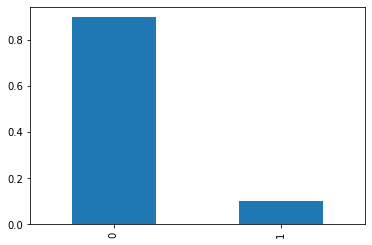

In [11]:
class_frequency = df['toxic'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar') 

In [12]:
df = df.sample(3000).reset_index(drop=True)
df.shape

(3000, 2)

–ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –±–∞–ª–∞–Ω—Å –∫–ª–∞—Å—Å–æ–≤ –≤ –ø–æ–ª—É—á–µ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ:

0    0.902333
1    0.097667
Name: toxic, dtype: float64


<AxesSubplot:>

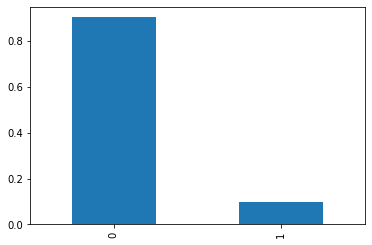

In [13]:
class_frequency = df['toxic'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar') 

## BERT 

### –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ —Ç–µ–∫—Å—Ç–æ–≤

–ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä –∏ –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ–º —Ç–µ–∫—Å—Ç –≤ –Ω–æ–º–µ—Ä–∞ —Ç–æ–∫–µ–Ω–æ–≤ –∏–∑ —Å–ª–æ–≤–∞—Ä—è:

In [14]:
tokenizer = transformers.AutoTokenizer.from_pretrained('unitary/toxic-bert')

In [15]:
df['tokenized'] = df['text'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True))

Token indices sequence length is longer than the specified maximum sequence length for this model (534 > 512). Running this sequence through the model will result in indexing errors


In [16]:
df = df.dropna()
df= df.reset_index(drop=True)

–í–∏–¥–∏–º —Ç–∞–∫–æ–µ —Å–æ–æ–±—â–µ–Ω–∏–µ:


`Token indices sequence length is longer than the specified maximum sequence length for this model (631 > 512). Running this sequence through the model will result in indexing errors`


–ü–æ—ç—Ç–æ–º—É –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ç–æ–ª—å–∫–æ –≤–µ–∫—Ç–æ—Ä—ã —Å –¥–ª–∏–Ω–æ–π –¥–æ 512, —á—Ç–æ–±—ã –∏–∑–±–µ–∂–∞—Ç—å –æ—à–∏–±–æ–∫.

In [17]:
MAX_LEN = 512
tokenized_proper = []                   # —Å–æ–∑–¥–∞–µ–º –ø—É—Å—Ç–æ–π —Å–ø–∏–æ–∫ –¥–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è –ø–æ–¥—Ö–æ–¥—è—â–∏—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤
target = []                             # –∏ —Å–ø–∏—Å–æ–∫ –¥–ª—è —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π –∏–∑ df['toxic']

for i in range(df.shape[0]):
    if len(df['tokenized'][i]) <= MAX_LEN:
        tokenized_proper.append(df['tokenized'][i])
        target.append(df['toxic'][i])

In [18]:
tokenized_proper = pd.Series(tokenized_proper)
target = pd.Series(target)

–ü—Ä–∏–º–µ–Ω–∏–º –º–µ—Ç–æ–¥ padding, —á—Ç–æ–±—ã —É—Ä–∞–≤–Ω—è—Ç—å –¥–ª–∏–Ω—ã –≤—Å–µ—Ö –≤–µ–∫—Ç–æ—Ä–æ–≤, –∞ —Ç–∞–∫–∂–µ –æ–ø—Ä–µ–¥–µ–ª–∏–º attention_mask, –∫–æ—Ç–æ—Ä–∞—è –ø–æ–∫–∞–∂–µ—Ç –º–æ–¥–µ–ª–∏, —á—Ç–æ –Ω—É–ª–∏ –Ω–µ –Ω–µ—Å—É—Ç –∑–Ω–∞—á–∏–º–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏:

In [19]:
padded = np.array([i + [0]*(MAX_LEN - len(i)) for i in tokenized_proper])
attention_mask = np.where(padded != 0, 1, 0) 

–ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º –º–æ–¥–µ–ª—å:

In [20]:
bert_model = transformers.AutoModel.from_pretrained('unitary/toxic-bert')

Some weights of the model checkpoint at unitary/toxic-bert were not used when initializing BertModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


–ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º —Ç–æ–∫–µ–Ω–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ —Ç–µ–∫—Å—Ç—ã –≤ —ç–º–±–µ–¥–¥–∏–Ω–≥–∏:

In [21]:
%%time

batch_size = 300
embeddings = []
for i in notebook.tqdm(range((padded.shape[0] // batch_size)+1)):
        batch = torch.LongTensor(padded[batch_size*i:batch_size*(i+1)]) 
        attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)])
        
        with torch.no_grad():
            batch_embeddings = bert_model(batch, attention_mask=attention_mask_batch)
        
        embeddings.append(batch_embeddings[0][:,0,:].numpy())

  0%|          | 0/10 [00:00<?, ?it/s]

CPU times: total: 4h 27min 19s
Wall time: 38min 31s


In [22]:
features = np.concatenate(embeddings)

print(features.shape)
print(target.shape)

(2927, 768)
(2927,)


## –û–±—É—á–µ–Ω–∏–µ

–†–∞–∑–¥–µ–ª–∏–º –¥–∞—Ç–∞—Å–µ—Ç –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏:

In [23]:
X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                   stratify=target)
print(X_train.shape)
print(X_test.shape)

(2341, 768)
(586, 768)


–û–ø—Ä–µ–¥–µ–ª–∏–º —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –ø–æ–∏—Å–∫–∞ –ª—É—á—à–µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è F1:

In [24]:
def best_f1(model, params):
    grid = GridSearchCV(model, params, scoring='f1') 
    grid.fit(X_train, y_train)
    f1 = grid.best_score_
    print('F1-–º–µ—Ä–∞ –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ:', round(f1, 3))
    return f1, grid.best_estimator_

### –õ–æ–≥–∏—Å—Ç–∏—á–µ—Å–∫–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è

In [29]:
params = {}

f1_lr, model_lr = best_f1(LogisticRegression(random_state=42, solver='liblinear'), params)

F1-–º–µ—Ä–∞ –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ: 0.926


### –î–µ—Ä–µ–≤–æ —Ä–µ—à–µ–Ω–∏–π

In [30]:
params = {'max_depth': range (1, 7),
          'min_samples_split': range (2, 7),
          'min_samples_leaf' : range(2, 7) }


f1_dt, model_dt = best_f1(DecisionTreeClassifier(random_state=42), params)

F1-–º–µ—Ä–∞ –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ: 0.909


### –°–ª—É—á–∞–π–Ω—ã–π –ª–µ—Å

In [31]:
params = {'n_estimators': range (1, 7),
              'max_depth': range (1, 7),
              'min_samples_split': range (2, 7),
              'min_samples_leaf' : range(2, 7)
              }


f1_rf, model_rf = best_f1(RandomForestClassifier(random_state=42), params)

F1-–º–µ—Ä–∞ –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ: 0.939


### CatBoost

In [32]:
params = {}

f1_cb, model_cb = best_f1(CatBoostClassifier(verbose=False, iterations=300,learning_rate=0.001, random_state=42), params)

F1-–º–µ—Ä–∞ –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ: 0.93


–û–±—ä–µ–¥–∏–Ω–∏–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –≤ –æ–¥–Ω—É —Ç–∞–±–ª–∏—Ü—É: 

In [33]:
results = pd.DataFrame([
    [f1_lr],
    [f1_dt],
    [f1_rf],
    [f1_cb]], 
    columns=['F1'],
    index=['LogisticRegression', 'DecisionTree', 'RandomForest', 'CatBoost'])
results.sort_values(by='F1', ascending=False)

F1
RandomForest        0.939074
CatBoost            0.929840
LogisticRegression  0.925839
DecisionTree        0.909187

–õ—É—á—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ –ø–æ–∫–∞–∑–∞–ª–∏ –º–æ–¥–µ–ª–∏ RandomForest - 0.939 –∏ –°atBoost - 0.929, –¥–∞–ª–µ–µ –ø—Ä–æ–≤–µ—Ä–∏–º –∏—Ö –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:

In [34]:
pred_test = model_rf.predict(X_test)
print('F1-–º–µ—Ä–∞ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:', round(f1_score(y_test, pred_test), 3))

F1-–º–µ—Ä–∞ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.924


In [35]:
pred_test = model_cb.predict(X_test)
print('F1-–º–µ—Ä–∞ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:', round(f1_score(y_test, pred_test), 3))

F1-–º–µ—Ä–∞ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.957


–ü–æ–ª—É—á–µ–Ω–Ω–æ–µ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ —Å –ø–æ–º–æ—â—å—é CatBoost –≤—ã—à–µ, —á–µ–º —É RandomForest - 0.957, –∑–Ω–∞—á–µ–Ω–∏–µ –ø—Ä–µ–≤—ã—à–∞–µ—Ç –∑–∞–¥–∞–Ω–Ω–æ–µ –∑–∞–∫–∞–∑—á–∏–∫–æ–º –≤ 0.75.

## –í—ã–≤–æ–¥—ã

–ó–∞–¥–∞—á–∞ –±—ã–ª–∞ –≤—ã–ø–æ–ª–Ω–µ–Ω–∞ —Å –ø–æ–º–æ—â—å—é –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ BERT(toxic-bert). –ù–∞–∏–ª—É—á—à–µ–π –º–æ–¥–µ–ª—å—é –¥–ª—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è —è–≤–ª—è–µ—Ç—Å—è –º–æ–¥–µ–ª—å RandomForest, —Å–æ –∑–Ω–∞—á–µ–Ω–∏–µ–º F1-–º–µ—Ä—ã –≤ 0.90, —á—Ç–æ –ø—Ä–µ–≤—ã—à–∞–µ—Ç –∑–∞–¥–∞–Ω–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –≤ 0.75.

–í —Ö–æ–¥–µ —Ä–∞–±–æ—Ç—ã –±—ã–ª–∏ –≤—ã–ø–æ–ª–Ω–µ–Ω—ã —Å–ª–µ–¥—É—é—â–∏–µ —à–∞–≥–∏:

 - –ó–∞–≥—Ä—É–∑–∫–∞ –∏ —á—Ç–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã–µ;

 - –ü—Ä–æ–≤–µ–ª–∏ —á–∞—Å—Ç–æ—Ç–Ω—ã–π –∞–Ω–∞–ª–∏–∑ —Ç–µ–∫—Å—Ç–∞ - –ø–æ—Å—Ç—Ä–æ–∏–ª–∏ –≥—Ä–∞—Ñ–∏–∫ –∏ –æ–±–ª–∞–∫–æ —Å–ª–æ–≤ –¥–ª—è –Ω–∞–∏–±–æ–ª–µ–µ –≤—Å—Ç—Ä–µ—á–∞—é—â–∏—Ö—Å—è —Å–ª–æ–≤ –≤ —Ç–µ–∫—Å—Ç–∞—Ö;
 
 - –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–ª–∏ —Ç–µ–∫—Å—Ç—ã –ø—Ä–∏ –ø–æ–º–æ—â–∏ –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ BERT(toxic-bert);

 - –û–±—É—á–∏–ª–∏ —Ä–∞–∑–ª–∏—á–Ω—ã–µ –º–æ–¥–µ–ª–∏; 
 
 - –ü–æ—Å—Ç—Ä–æ–∏–ª–∏ —Ç–∞–±–ª–∏—Ü—É —Å–æ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –º–µ—Ç—Ä–∏–∫–∏ –¥–ª—è –∫–∞–∂–¥–æ–π –º–æ–¥–µ–ª–∏;
 
 - –í—ã–±—Ä–∞–ª–∏ –ª—É—á—à—É—é –º–æ–¥–µ–ª—å.